In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/MyDrive/animal_classification_ngo_datasets/dataset.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/dataset.zip')
archive.extractall('/content')

In [ ]:
animals_data = '/content/Animals'
non_animals_data = '/content/No_Animals'

In [ ]:
import os

In [ ]:
os.mkdir('/content/animals_dataset')
os.mkdir('/content/animals_dataset/train')
os.mkdir('/content/animals_dataset/test')
os.mkdir('/content/animals_dataset/train/Animals')
os.mkdir('/content/animals_dataset/test/Animals')
os.mkdir('/content/animals_dataset/train/No_Animals')
os.mkdir('/content/animals_dataset/test/No_Animals')

In [ ]:
dataset = '/content/animals_dataset'

In [ ]:
animals_num = len(os.listdir(animals_data))
no_animals_num = len(os.listdir(non_animals_data))
print("There are {} animal pictures in the datasets".format(animals_num))
print("There are {} non_animal pictures in the datasets".format(no_animals_num)) 

There are 532 animal pictures in the datasets
There are 877 non_animal pictures in the datasets


In [ ]:
categories = ['Animals','No_Animals']

In [ ]:
import shutil 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [ ]:
def split_datasets(data_dir):
  i = 0
  category = data_dir.split('/')[-1]
  for img in os.listdir(data_dir):
    i+=1
    if i % 5 == 0:
      shutil.move(os.path.join(data_dir,img),os.path.join(dataset,'test',category,img))
    else:
      shutil.move(os.path.join(data_dir,img),os.path.join(dataset,'train',category,img))

In [ ]:
split_datasets(data_dir=animals_data)
split_datasets(data_dir=non_animals_data)

In [ ]:
for split_type in os.listdir(dataset):
  path_to_split_type = os.path.join(dataset,split_type)
  for category in categories:
    path_to_category = os.path.join(path_to_split_type,category)
    if split_type == "train":
      print("There are {} training images of {} category".format(len(os.listdir(path_to_category)),category))
    else:
      print("There are {} testing images of {} category".format(len(os.listdir(path_to_category)),category))

There are 426 training images of Animals category
There are 702 training images of No_Animals category
There are 106 testing images of Animals category
There are 175 testing images of No_Animals category


<h1>Data Augmentation </h1>

In [ ]:
def make_horizontal_flips(dataset):
  for split_type in os.listdir(dataset):
    path_to_split_type = os.path.join(dataset,split_type)
    for category in categories:
      path_to_category = os.path.join(path_to_split_type,category)
      for img in os.listdir(path_to_category):
        img_array = cv2.imread(os.path.join(path_to_category,img))
        flipped_img_name = img.split('.')[0] + 'hr_flip' + '.jpg'
        horizontal_flip_img = cv2.flip(img_array, 1)
        cv2.imwrite(os.path.join(path_to_category,flipped_img_name),horizontal_flip_img)


In [ ]:
make_horizontal_flips(dataset=dataset)

In [ ]:
for split_type in os.listdir(dataset):
  path_to_split_type = os.path.join(dataset,split_type)
  for category in categories:
    path_to_category = os.path.join(path_to_split_type,category)
    if split_type == "train" and category == categories[0]:
      train_animals = os.listdir(path_to_category)
      print("There are {} training images of {} category".format(len(os.listdir(path_to_category)),category))
    elif split_type == "train" and category == categories[1]:
      train_no_animals = os.listdir(path_to_category)
      print("There are {} training images of {} category".format(len(os.listdir(path_to_category)),category))
    elif split_type == "test" and category == categories[0]:
      test_animals = os.listdir(path_to_category)
      print("There are {} testing images of {} category".format(len(os.listdir(path_to_category)),category))
    elif split_type == "test" and category == categories[1]:
      test_no_animals = os.listdir(path_to_category)
      print("There are {} testing images of {} category".format(len(os.listdir(path_to_category)),category))
    else:
      pass

There are 852 training images of Animals category
There are 1404 training images of No_Animals category
There are 212 testing images of Animals category
There are 350 testing images of No_Animals category


In [ ]:
print(train_animals)
print(len(train_animals))
print(train_no_animals)
print(len(train_no_animals))
print(test_animals)
print(len(test_animals))
print(test_no_animals)
print(len(test_no_animals))

['first_folder348PTDC0027.jpg', 'first_folder160PTDC0072.jpg', 'first_folder369PTDC0001.jpg', 'third_folder47120210425T13571003.jpg', 'first_folder332PICT0222hr_flip.jpg', 'first_folder325PICT0148.jpg', 'first_folder68PTDC0191.jpg', 'fifth_folder3PTDC1767hr_flip.jpg', 'third_folder48020210505T09020203.jpg', 'third_folder43720210428T04040601.jpg', 'first_folder68PTDC0191hr_flip.jpg', 'first_folder168PTDC0226hr_flip.jpg', 'third_folder49620210504T07035502hr_flip.jpg', 'first_folder369PTDC0001hr_flip.jpg', 'first_folder239PTDC0207hr_flip.jpg', 'first_folder8PTDC0225hr_flip.jpg', 'first_folder331PICT0106.jpg', 'first_folder250PTDC0149.jpg', 'first_folder235PTDC0096hr_flip.jpg', 'first_folder172PTDC0195.jpg', 'first_folder6PTDC0246hr_flip.jpg', 'first_folder180PTDC0071.jpg', 'first_folder141PTDC0192hr_flip.jpg', 'first_folder162PTDC0102.jpg', 'third_folder43220210424T07264803.jpg', 'first_folder302PTDC0003hr_flip.jpg', 'first_folder346PICT0034.jpg', 'third_folder45920210427T21552401hr_flip.

In [ ]:
#  Importing necessary functions 
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        rotation_range = 30, 
        brightness_range = (0.6, 1.4))
for index in tqdm(range(len(train_animals))):
  # Loading a sample image  
  img_name = train_animals[index].split('.')[0]
  img = load_img(os.path.join(dataset,'train',categories[0],train_animals[index]))
  # Converting the input sample image to an array 
  x = img_to_array(img) 
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  
    
  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 1
  for batch in datagen.flow(x, batch_size = 1, 
                            save_to_dir ='/content/animals_dataset/train/Animals',  
                            save_prefix = img_name +'augmentations', save_format ='jpg'): 
      i += 1
      if i > 4: 
          break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
#  Importing necessary functions 
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        rotation_range = 30, 
        brightness_range = (0.6, 1.4))
for index in tqdm(range(len(train_no_animals))):
  # Loading a sample image  
  img_name = train_no_animals[index].split('.')[0]
  img = load_img(os.path.join(dataset,'train',categories[1],train_no_animals[index]))
  # Converting the input sample image to an array 
  x = img_to_array(img) 
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  
    
  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 1
  for batch in datagen.flow(x, batch_size = 1, 
                            save_to_dir ='/content/animals_dataset/train/No_Animals',  
                            save_prefix =img_name + 'augmentations', save_format ='jpg'): 
      i += 1
      if i > 2: 
          break

100%|██████████| 1404/1404 [14:31<00:00,  1.61it/s]


In [ ]:
#  Importing necessary functions 
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        rotation_range = 30, 
        brightness_range = (0.6, 1.4))
for index in tqdm(range(len(test_animals))):
  # Loading a sample image  
  img_name = test_animals[index].split('.')[0]
  img = load_img(os.path.join(dataset,'test',categories[0],test_animals[index]))
  # Converting the input sample image to an array 
  x = img_to_array(img) 
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  
    
  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 1
  for batch in datagen.flow(x, batch_size = 1, 
                            save_to_dir ='/content/animals_dataset/test/Animals',  
                            save_prefix =img_name + 'augmentations', save_format ='jpg'): 
      i += 1
      if i > 4: 
          break

100%|██████████| 212/212 [04:19<00:00,  1.22s/it]


In [ ]:
#  Importing necessary functions 
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img 
   
# Initialising the ImageDataGenerator class. 
# We will pass in the augmentation parameters in the constructor. 
datagen = ImageDataGenerator( 
        rotation_range = 30, 
        brightness_range = (0.6, 1.4))
for index in tqdm(range(len(test_no_animals))):
  # Loading a sample image  
  img_name = test_no_animals[index].split('.')[0]
  img = load_img(os.path.join(dataset,'test',categories[1],test_no_animals[index]))
  # Converting the input sample image to an array 
  x = img_to_array(img) 
  # Reshaping the input image 
  x = x.reshape((1, ) + x.shape)  
    
  # Generating and saving 5 augmented samples  
  # using the above defined parameters.  
  i = 1
  for batch in datagen.flow(x, batch_size = 1, 
                            save_to_dir ='/content/animals_dataset/test/No_Animals',  
                            save_prefix = img_name + 'augmentations', save_format ='jpg'): 
      i += 1
      if i > 2: 
          break

In [ ]:
from os.path import basename
basename(dataset)

'/content/animals_dataset'

In [ ]:
from zipfile import ZipFile
import os
from os.path import basename
# create a ZipFile object
with ZipFile('augmented_animal_datasets.zip', 'w') as zipobj:
  maindir = basename(dataset)
  zipobj.write(dataset,maindir)
  for split_type in os.listdir(dataset):
    path_to_split_type = os.path.join(dataset,split_type)
    zipobj.write(path_to_split_type,os.path.join(maindir,split_type))
    for label in os.listdir(path_to_split_type):
      path_to_label = os.path.join(path_to_split_type,label)
      zipobj.write(path_to_label,os.path.join(maindir,split_type,label))
      for img in os.listdir(path_to_label):
        path_to_img = os.path.join(path_to_label,img)
        zipobj.write(path_to_img,os.path.join(maindir,split_type,label,img))

In [ ]:
!cp -r "/content/augmented_animal_datasets.zip" "/content/gdrive/MyDrive/animal_classification_ngo_datasets"

In [2]:
!cp -r "/content/gdrive/MyDrive/animal_classification_ngo_datasets/augmented_animal_datasets.zip" "/content"

In [13]:
import numpy as np
import zipfile 
import matplotlib.pyplot as plt
import shutil
import os
import cv2

In [4]:
archive = zipfile.ZipFile('/content/augmented_animal_datasets.zip')
archive.extractall('/content/')

In [5]:
categories = ['Animals','No_Animals']

**<h1>Datasets Visualization </h1>**

In [6]:
dataset =   '/content/animals_dataset'
train_dir = '/content/animals_dataset/train'
test_dir = '/content/animals_dataset/test'

In [7]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [8]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [9]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/animals_dataset/train/Animals/first_folder247PTDC0177augmentations_0_4709.jpg', '/content/animals_dataset/train/Animals/first_folder348PTDC0027.jpg', '/content/animals_dataset/train/Animals/fifth_folder48PTDC0841augmentations_0_2560.jpg', '/content/animals_dataset/train/Animals/fifth_folder42PTDC1788hr_flipaugmentations_0_6983.jpg', '/content/animals_dataset/train/Animals/first_folder303PICT0075augmentations_0_5588.jpg', '/content/animals_dataset/train/Animals/first_folder160PTDC0072.jpg', '/content/animals_dataset/train/Animals/third_folder44020210427T21572901augmentations_0_3391.jpg', '/content/animals_dataset/train/Animals/third_folder44920210505T09020202augmentations_0_5676.jpg', '/content/animals_dataset/train/Animals/first_folder328PICT0103augmentations_0_3882.jpg', '/content/animals_dataset/train/Animals/first_folder369PTDC0001.jpg', '/content/animals_dataset/train/Animals/first_folder115PTDC0206augmentations_0_9894.jpg', '/content/animals_dataset/train/Animals/first_

**<h2>Training Dataset Visualization </h2>**

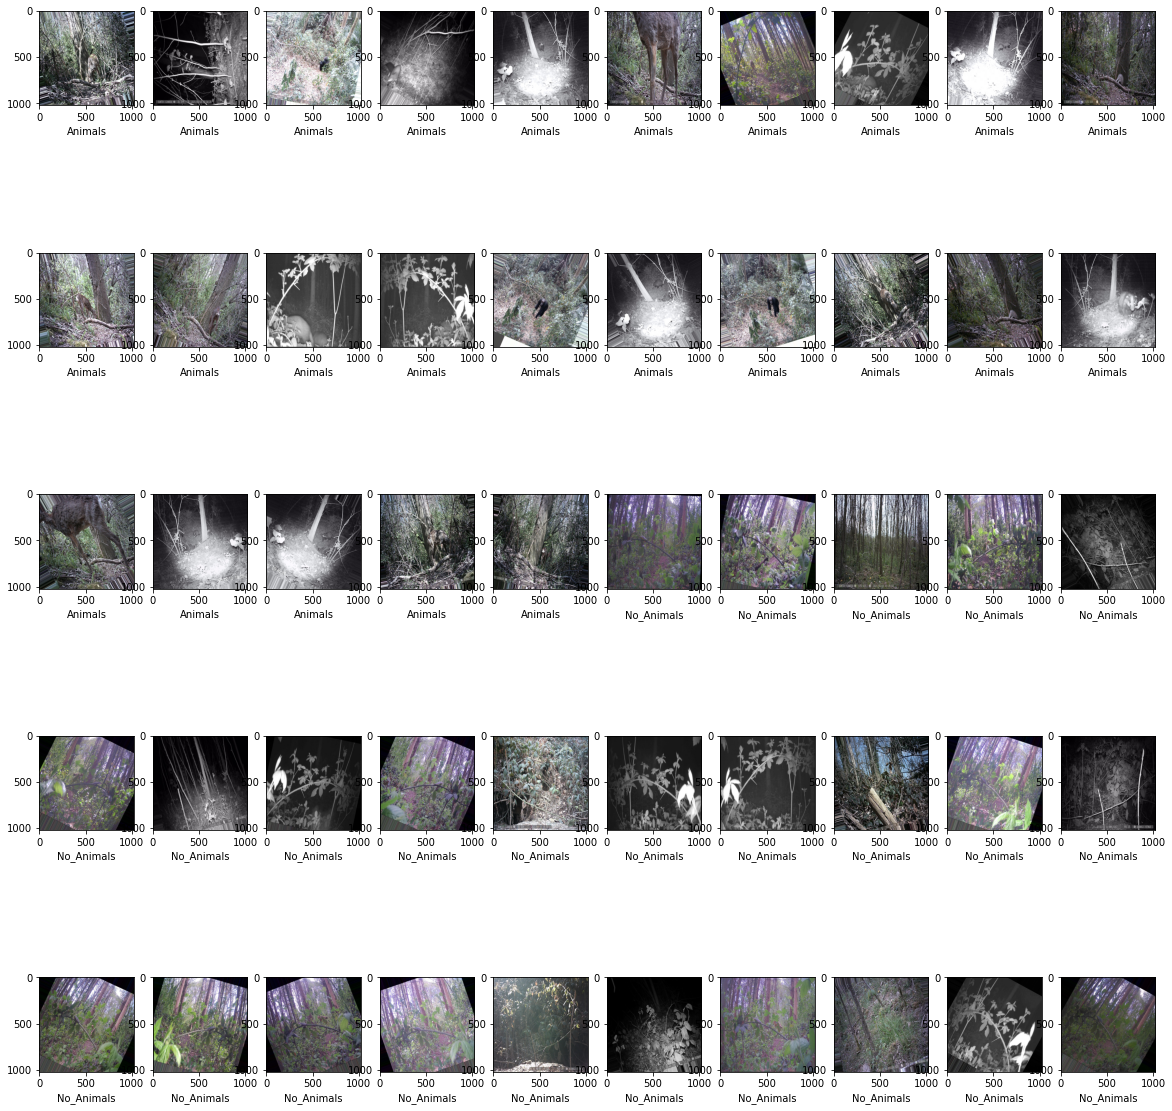

In [14]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

**<h2>Testing Dataset Visualization </h2>**

In [15]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/animals_dataset/test/Animals/first_folder158PTDC0256hr_flipaugmentations_0_5594.jpg', '/content/animals_dataset/test/Animals/third_folder46420210428T14403201hr_flip.jpg', '/content/animals_dataset/test/Animals/first_folder188PTDC0113.jpg', '/content/animals_dataset/test/Animals/first_folder10PTDC0179hr_flipaugmentations_0_351.jpg', '/content/animals_dataset/test/Animals/first_folder387PICT0027hr_flipaugmentations_0_4285.jpg', '/content/animals_dataset/test/Animals/fifth_folder54PTDC0019augmentations_0_9362.jpg', '/content/animals_dataset/test/Animals/first_folder60PTDC0233augmentations_0_2497.jpg', '/content/animals_dataset/test/Animals/first_folder326PICT0111augmentations_0_9274.jpg', '/content/animals_dataset/test/Animals/first_folder47PTDC0208hr_flipaugmentations_0_6887.jpg', '/content/animals_dataset/test/Animals/first_folder60PTDC0233augmentations_0_6082.jpg', '/content/animals_dataset/test/Animals/first_folder206PTDC0184augmentations_0_3302.jpg', '/content/animals_data

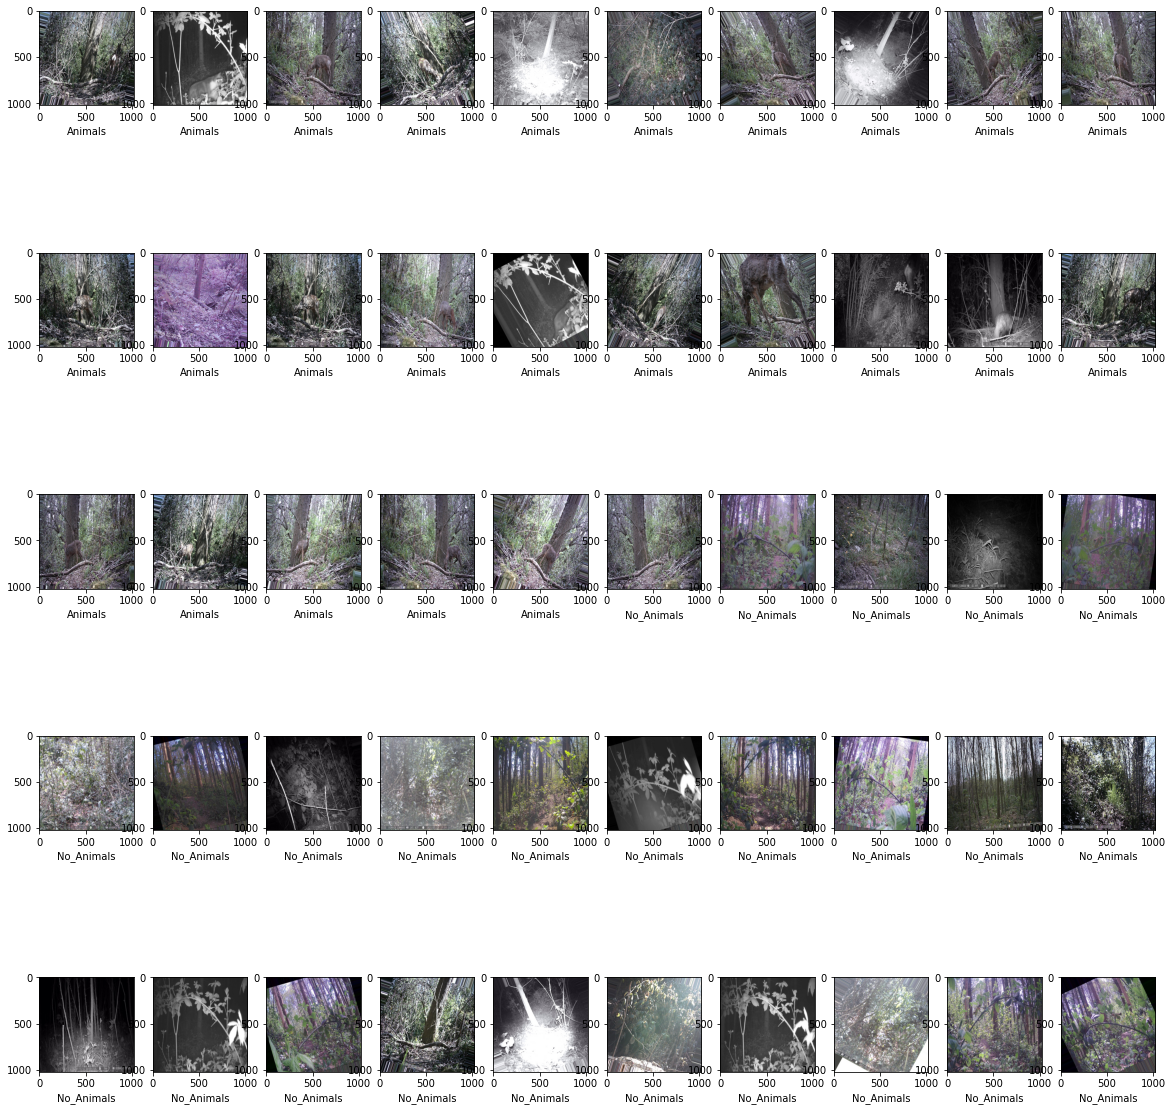

In [16]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

<h1>Model Building & Preparation</h1>

In [37]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications import Xception
from keras.models import model_from_json
import json

In [38]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.25,fill_mode='nearest',shear_range=0.25,zoom_range=0.5,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(400,400),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 8472 images belonging to 2 classes.


In [40]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(400,400),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 2085 images belonging to 2 classes.


In [41]:
xception = Xception(weights="imagenet",include_top=False,input_tensor=Input(shape=(400,400,3)))

In [42]:
xception.trainable = False

In [43]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(xception.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 151

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in mobilenet.layers[:fine_tune_at]:
#   layer.trainable =  False

Number of layers in the base model:  132


In [44]:
output = Flatten()(xception.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [45]:
model = Model(inputs = xception.input,outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 400, 400, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 199, 199, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 199, 199, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 199, 199, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [46]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [34]:
import os
os.mkdir('/content/model_weights/')

In [35]:
model_checkpoint = ModelCheckpoint('./model_weights/animal_classification_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [47]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 50,
    callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
338/338 [==============================] - 563s 2s/step - loss: 0.6629 - accuracy: 0.6094 - val_loss: 0.4593 - val_accuracy: 0.7981

Epoch 00001: val_loss improved from inf to 0.45926, saving model to ./model_weights/animal_classification_model_01-0.798072.h5
Epoch 2/50
338/338 [==============================] - 516s 2s/step - loss: 0.4824 - accuracy: 0.7946 - val_loss: 0.3938 - val_accuracy: 0.8164

Epoch 00002: val_loss improved from 0.45926 to 0.39385, saving model to ./model_weights/animal_classification_model_02-0.816386.h5
Epoch 3/50
338/338 [==============================] - 529s 2s/step - loss: 0.4175 - accuracy: 0.8248 - val_loss: 0.3571 - val_accuracy: 0.8443

Epoch 00003: val_loss improved from 0.39385 to 0.35709, saving model to ./model_weights/animal_classification_model_03-0.844337.h5
Epoch 4/50
338/338 [==============================] - 526s 2s/step - loss: 0.3962 - accuracy: 0.8316 - val_loss: 0.3429 - val_accuracy: 0.8492

Epoch 00004: val_loss improved from

In [36]:
# serialize model to JSON
model_json = model.to_json()
with open("animal_classification_poc_model.json", "w") as json_file:
    json_file.write(model_json)

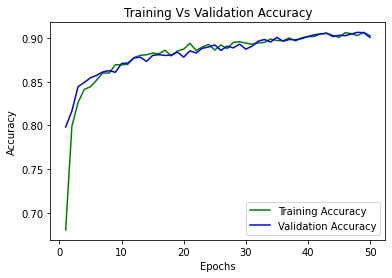

In [49]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

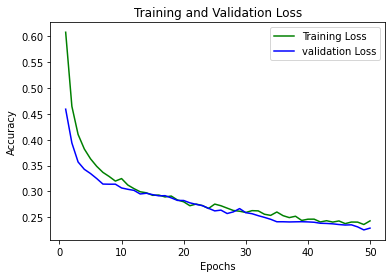

In [51]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
categories

['Animals', 'No_Animals']

In [53]:
from keras.preprocessing import image
import numpy as np
def check_animals(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(400,400))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [54]:
test_dir

'/content/animals_dataset/test'

In [55]:
check_animals(test_dir,categories[0])

{'Animals': 951, 'No_Animals': 109}

In [56]:
check_animals(test_dir,categories[1])

{'Animals': 97, 'No_Animals': 928}

In [59]:
dataset

'/content/animals_dataset'

In [78]:
def check_predictions(dataset_dir):
  y_true = []
  y_pred = [] 
  for category_type in os.listdir(dataset_dir):
    print(category_type)
    path_to_category_type = os.path.join(dataset_dir,category_type)
    for img in os.listdir(path_to_category_type):
      img = image.load_img(os.path.join(path_to_category_type,img),target_size=(400,400))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
        real_class = categories.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
      else:
        prediction_class = 0
        real_class = categories.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)

  return [y_true,y_pred]

In [79]:
[y_true,y_pred] = check_predictions(test_dir)
print(len(y_true))
print(len(y_pred))

Animals
No_Animals
2085
2085


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=categories))

Confusion Matrix
[[951 109]
 [ 97 928]]
Classification Report
              precision    recall  f1-score   support

     Animals       0.91      0.90      0.90      1060
  No_Animals       0.89      0.91      0.90      1025

    accuracy                           0.90      2085
   macro avg       0.90      0.90      0.90      2085
weighted avg       0.90      0.90      0.90      2085

